# Data Preprocessing 

## Libraries

In [303]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#other:
from ast import literal_eval
from collections import Counter

# Load and peak data

In [44]:
filename = "all_books_popularByDate.csv"
base_dir = "."
data_dir = "data"
fullpath = os.path.join(base_dir, data_dir, filename)
print(fullpath)

.\data\all_books_popularByDate.csv


In [45]:
df = pd.read_csv(fullpath)
df.head()

,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,genres,characters,series,asin,rating_histogram,original_publish_year,isbn,isbn13,awards,places
0,https://www.goodreads.com/book/show/38260251-t...,Tangled Like Us,Krista Ritchie,3506,510,4.08,484.0,English,2019-01-17 00:00:00,"['New Adult', 'Romance', 'Contemporary Romance...","['Jane Cobalt', 'Thatcher Moretti']",Like Us #4,B07JLLFFSX,"{'5': 1483, '4': 1164, '3': 611, '2': 159, '1'...",[],[],[],[],[]
1,https://www.goodreads.com/book/show/44094817-t...,The Castle Mystery,Joyce Cato,2567,153,4.28,219.0,English,2019-02-27 00:00:00,"['Cozy Mystery', 'Mystery', 'Crime']",NaN,Jenny Starling #4,B07NWV6LVD,"{'5': 1250, '4': 878, '3': 365, '2': 59, '1': 15}",2012.0,[],[],[],[]
2,https://www.goodreads.com/book/show/36300682-w...,When You Read This,Mary Adkins,3079,633,3.58,400.0,[],2019-02-05 00:00:00,"['Chick Lit', 'Fiction', 'Contemporary', 'Wome...",NaN,[],[],"{'5': 434, '4': 1267, '3': 1082, '2': 257, '1'...",[],62834703.0,9780062834706.0,[],[]
3,https://www.goodreads.com/book/show/50212494-t...,The Flatshare,Beth O'Leary,71110,10764,4.13,336.0,English,2019-04-10 00:00:00,"['Audiobook', 'Chick Lit', 'Fiction', 'Romance...",NaN,[],B07DCZ7LM4,"{'5': 26969, '4': 29723, '3': 11643, '2': 2121...",[],[],[],['Goodreads Choice Award Nominee for Romance (...,[]
4,https://www.goodreads.com/book/show/46006080-t...,Too Many,Alexa Riley,2852,268,3.77,71.0,[],2019-05-23 00:00:00,"['Romance', 'Menage', 'M F M', 'Erotica', 'Adu...",NaN,Too Series #2,B07SBHPPN7,"{'5': 957, '4': 772, '3': 737, '2': 275, '1': ...",[],[],[],[],[]


In [50]:
df.info(null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   url               object 
 1   title             object 
 2   author            object 
 3   num_ratings       int64  
 4   num_reviews       int64  
 5   avg_rating        float64
 6   num_pages         object 
 7   language          object 
 8   publish_date      object 
 9   genres            object 
 10  series            object 
 11  rating_histogram  object 
 12  awards            object 
dtypes: float64(1), int64(2), object(10)
memory usage: 469.3+ KB


In [51]:
df.isnull().sum()

url                   0
title                 0
author                0
num_ratings           0
num_reviews           0
avg_rating            0
num_pages           207
language            323
publish_date          5
genres               64
series              559
rating_histogram    908
awards              988
dtype: int64

In [48]:
df_original = df.copy()

In [49]:
mask = ['characters', 'asin', 'isbn', 'isbn13', 'places', 'original_publish_year']

df.drop(mask, axis = 1, inplace = True)

In [101]:
df.shape

(4619, 14)

## preprocessing

### NA's

replacing empty lists with proper nan value

In [53]:
df.replace('[]', np.nan, inplace=True)

dropping the book with missing title

In [54]:
mask = df.title.isnull()
idx = df[mask].index

df.drop(idx, inplace = True)

percentage of nan values per column

In [92]:
(df.isnull().sum() / df.shape[0])

url                 0.000000
title               0.000000
author              0.000000
num_ratings         0.000000
num_reviews         0.000000
avg_rating          0.000000
num_pages           0.124053
language            0.324096
publish_date        0.208920
genres              0.101321
series              0.637584
rating_histogram    0.196363
awards              0.867287
dtype: float64

Note: we have as well observations which in principle are NAs because they solely feature title & author

like this:

In [203]:
df.loc[2395]

url                 https://www.goodreads.com/book/show/53026762-d...
title                                                        Dr Death
author                                                James Patterson
num_ratings                                                         0
num_reviews                                                         0
avg_rating                                                          0
num_pages                                                         NaN
language                                                          NaN
publish_date                                                      NaT
genres                                                            NaN
series                                                            NaN
rating_histogram                                                  NaN
awards                                                            NaN
age                                                               NaN
Name: 2395, dtype: o

### dtypes

In [103]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4619 entries, 0 to 4619
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   url               object        
 1   title             object        
 2   author            object        
 3   num_ratings       int64         
 4   num_reviews       int64         
 5   avg_rating        float64       
 6   num_pages         float64       
 7   language          object        
 8   publish_date      datetime64[ns]
 9   genres            object        
 10  series            object        
 11  rating_histogram  object        
 12  awards            object        
 13  age               float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 541.3+ KB


num_pages to float

In [58]:
df.num_pages = df.num_pages.astype(np.float)

publish date as datetime

In [102]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

### duplicates

checking for duplicated observations

In [127]:
df.duplicated().any()

False

checking for duplicated titles

In [147]:
tdf = (len(df) - df.nunique())

print('duplicate titles: total, percent')
print(tdf.title, tdf.title / df.shape[0])

tdf

duplicate titles: total, percent
586 0.12686728729162156


url                    0
title                586
author              1523
num_ratings         2080
num_reviews         3029
avg_rating          4411
num_pages           4166
language            4618
publish_date        4225
genres              2246
series              3142
rating_histogram    1225
awards              4364
age                 4227
dtype: int64

we have a few duplicated titles which feature different URLs

In [146]:
mask = df.duplicated(['title', 'author'], keep = False)

df[mask].sort_values('title').iloc[:50]

,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,genres,series,rating_histogram,awards,age
2261,https://www.goodreads.com/book/show/36300625-9...,99 Percent Mine,Sally Thorne,31691,5041,3.46,368.0,English,2019-01-29,"['Audiobook', 'Chick Lit', 'Fiction', 'Romance...",NaN,"{'5': 5780, '4': 10152, '3': 10035, '2': 4161,...",NaN,487.0
2211,https://www.goodreads.com/book/show/33979520-9...,99 Percent Mine,Sally Thorne,31690,5041,3.46,368.0,English,2019-01-29,"['Audiobook', 'Chick Lit', 'Fiction', 'Romance...",NaN,"{'5': 5780, '4': 10152, '3': 10034, '2': 4161,...",NaN,487.0
2554,https://www.goodreads.com/book/show/52894936-a...,A Bend in the Stars,Rachel Barenbaum,2323,421,3.88,480.0,NaN,2020-05-12,"['Cultural', 'Jewish', 'World War I', 'Histori...",NaN,"{'5': 634, '4': 987, '3': 537, '2': 127, '1': 38}",NaN,18.0
1609,https://www.goodreads.com/book/show/41717484-a...,A Bend in the Stars,Rachel Barenbaum,2337,422,3.88,464.0,NaN,2019-05-14,"['Audiobook', 'World War I', 'Fiction', 'Histo...",NaN,"{'5': 636, '4': 994, '3': 541, '2': 128, '1': 38}",NaN,382.0
504,https://www.goodreads.com/book/show/44418064-a...,A Better Bad Idea,Laurie Devore,2,2,5.00,NaN,English,NaT,"['Contemporary', 'Young Adult']",NaN,NaN,NaN,NaN
306,https://www.goodreads.com/book/show/50904912-a...,A Better Bad Idea,Laurie Devore,2,2,5.00,352.0,English,NaT,"['Contemporary', 'Young Adult']",NaN,NaN,NaN,NaN
1187,https://www.goodreads.com/book/show/44044300-a...,A Better Man,Louise Penny,26543,3434,4.33,417.0,English,2019-08-27,"['Cultural', 'Mystery', 'Canada', 'Fiction']",Chief Inspector Armand Gamache #15,"{'5': 13124, '4': 9796, '3': 3040, '2': 460, '...",['Goodreads Choice Award Nominee for Mystery &...,277.0
1214,https://www.goodreads.com/book/show/44034500-a...,A Better Man,Louise Penny,26526,3433,4.33,437.0,English,2019-08-27,"['Cultural', 'Mystery', 'Canada', 'Fiction']",Chief Inspector Armand Gamache #15,"{'5': 13116, '4': 9789, '3': 3039, '2': 460, '...",['Goodreads Choice Award Nominee for Mystery &...,277.0
53,https://www.goodreads.com/book/show/52767317-a...,A Cup of Silver Linings,Karen Hawkins,1,0,4.00,352.0,NaN,NaT,"['Chick Lit', 'Magical Realism', 'Romance', 'W...",Dove Pond #2,NaN,NaN,NaN
154,https://www.goodreads.com/book/show/52759614-a...,A Cup of Silver Linings,Karen Hawkins,1,0,4.00,352.0,NaN,NaT,"['Chick Lit', 'Magical Realism', 'Romance', 'W...",Dove Pond #2,NaN,NaN,NaN


the duplicates are different versions of the book (ebook vs. paperback). The statistics are somehow version-independent. Therefore we throw out the duplicate titles & keep those with the highest review count

In [151]:
(df
 .sort_values('num_reviews', ascending = False)
 .drop_duplicates(['title', 'author'], 
                  keep = 'first', 
                  inplace = True))

### future books

In [164]:
mask = df.publish_date > datetime.datetime.now()

print(df[mask].shape[0] / df.shape[0])

df.drop(index = df[mask].index, inplace = True)

0.0


21.5% óf our books come out later than today ... this is not good. Therefore, we drop them.

## Feature Engineering

book age

In [112]:
df['pd_aux'] = pd.to_datetime(df['publish_date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
date_time_now = datetime.datetime.now()
age = date_time_now - df['pd_aux']
age = age.apply(lambda x: x.days)
df['age'] = age
df.drop('pd_aux', axis = 1, inplace = True)

### Genres

In [248]:
tdf = df.head()

In [260]:
#get the counts of all genres in the genre column

def gen_dicker(data, var):
    dic = {}
    for value in data[var]:
        try:
            liste = literal_eval(value)
            for genre in liste:
                if genre not in dic:
                    dic[genre] = 1
                else:
                    dic[genre] += 1
        except ValueError:
            continue

    return dic

gen_dicker(df, 'genres')

{'New Adult': 139,
 'Romance': 930,
 'Contemporary Romance': 316,
 'Contemporary': 940,
 'Cozy Mystery': 20,
 'Mystery': 720,
 'Crime': 217,
 'Chick Lit': 194,
 'Fiction': 1740,
 'Womens Fiction': 208,
 'Adult': 503,
 'Audiobook': 595,
 'Adult Fiction': 243,
 'European Literature': 46,
 'Humor': 93,
 'British Literature': 30,
 'Menage': 3,
 'M F M': 1,
 'Erotica': 14,
 'Novella': 23,
 'Realistic Fiction': 82,
 'Young Adult': 698,
 'Psychology': 53,
 'Abuse': 17,
 'Language': 11,
 'Health': 51,
 'Sociology': 37,
 'Personal Development': 28,
 'Nonfiction': 391,
 'Mental Health': 37,
 'Family': 69,
 'Relationships': 6,
 'Self Help': 66,
 'Communication': 2,
 'Polyamorous': 41,
 'High School': 48,
 'Reverse Harem': 41,
 'Historical': 491,
 'Holocaust': 16,
 'World War II': 105,
 'War': 136,
 'Historical Fiction': 464,
 'Fantasy': 684,
 'Fairy Tales': 15,
 'Mystery Thriller': 343,
 'Thriller': 582,
 'Middle Grade': 71,
 'Paranormal': 167,
 'Childrens': 93,
 'LGBT': 196,
 'African American':

In [306]:
#collect top n genres
n = 20
tdic = gen_dicker(df, 'genres')

k = Counter(tdic)

top_genres = k.most_common(n)

top_genres[:5]

[('Fiction', 1740),
 ('Contemporary', 940),
 ('Romance', 930),
 ('Mystery', 720),
 ('Young Adult', 698)]

In [275]:
#for each genre, create a column
for genre, count in k.most_common(20):
    #tdf = tdf.assign(genre = np.nan)
    tdf[genre] = False

tdf

,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,genres,...,Historical Fiction,Nonfiction,Mystery Thriller,Contemporary Romance,Suspense,Adult Fiction,Science Fiction,Crime,Womens Fiction,LGBT
0,https://www.goodreads.com/book/show/38260251-t...,Tangled Like Us,Krista Ritchie,3506,510,4.08,484.0,English,2019-01-17,"['New Adult', 'Romance', 'Contemporary Romance...",...,False,False,False,False,False,False,False,False,False,False
1,https://www.goodreads.com/book/show/44094817-t...,The Castle Mystery,Joyce Cato,2567,153,4.28,219.0,English,2019-02-27,"['Cozy Mystery', 'Mystery', 'Crime']",...,False,False,False,False,False,False,False,False,False,False
2,https://www.goodreads.com/book/show/36300682-w...,When You Read This,Mary Adkins,3079,633,3.58,400.0,NaN,2019-02-05,"['Chick Lit', 'Fiction', 'Contemporary', 'Wome...",...,False,False,False,False,False,False,False,False,False,False
3,https://www.goodreads.com/book/show/50212494-t...,The Flatshare,Beth O'Leary,71110,10764,4.13,336.0,English,2019-04-10,"['Audiobook', 'Chick Lit', 'Fiction', 'Romance...",...,False,False,False,False,False,False,False,False,False,False
4,https://www.goodreads.com/book/show/46006080-t...,Too Many,Alexa Riley,2852,268,3.77,71.0,NaN,2019-05-23,"['Romance', 'Menage', 'M F M', 'Erotica', 'Adu...",...,False,False,False,False,False,False,False,False,False,False


In [311]:
def genre_filler(data, genre):
    tlist = [genre in genre_values for genre_values in data.genres]
    return tlist

genre_filler(tdf, 'Fiction')

[False, False, True, True, True]

In [320]:
mask = ['Fiction', 'Contemporary',
       'Romance', 'Mystery', 'Young Adult', 'Fantasy', 'Audiobook', 'Thriller',
       'Adult', 'Historical', 'Historical Fiction', 'Nonfiction',
       'Mystery Thriller', 'Contemporary Romance', 'Suspense', 'Adult Fiction',
       'Science Fiction', 'Crime', 'Womens Fiction', 'LGBT']

tdf[mask]

for column in tdf[mask]:
    print(column)
    print(genre_filler(tdf, column))    

Fiction
[False, False, True, True, True]
Contemporary
[True, False, True, True, False]
Romance
[True, False, False, True, True]
Mystery
[False, True, False, False, False]
Young Adult
[False, False, False, False, False]
Fantasy
[False, False, False, False, False]
Audiobook
[False, False, False, True, False]
Thriller
[False, False, False, False, False]
Adult
[True, False, True, True, True]
Historical
[False, False, False, False, False]
Historical Fiction
[False, False, False, False, False]
Nonfiction
[False, False, False, False, False]
Mystery Thriller
[False, False, False, False, False]
Contemporary Romance
[True, False, False, True, False]
Suspense
[False, False, False, False, False]
Adult Fiction
[False, False, False, True, True]
Science Fiction
[False, False, False, False, False]
Crime
[False, True, False, False, False]
Womens Fiction
[False, False, True, True, False]
LGBT
[False, False, False, False, False]


In [228]:
x = tdf.loc[0, 'genres']
y = literal_eval(x)

for element in y:
    print(element)

New Adult
Romance
Contemporary Romance
Contemporary


# Explore data

## univariat

In [180]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3624 entries, 0 to 4241
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   url               object        
 1   title             object        
 2   author            object        
 3   num_ratings       int64         
 4   num_reviews       int64         
 5   avg_rating        float64       
 6   num_pages         float64       
 7   language          object        
 8   publish_date      datetime64[ns]
 9   genres            object        
 10  series            object        
 11  rating_histogram  object        
 12  awards            object        
 13  age               float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 424.7+ KB


#### categorical:

how much times was each author featured?

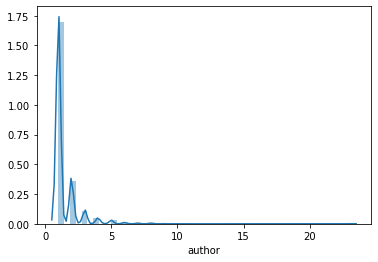

In [198]:
sns.distplot(df.author.value_counts())

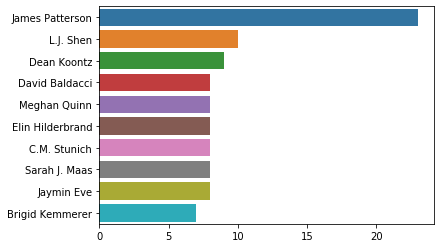

In [196]:
n = 10
data = df['author'].value_counts().nlargest(n)

sns.barplot(data.values, data.index)

In [199]:
mask = df.author == 'James Patterson'

df[mask]

,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,genres,series,rating_histogram,awards,age
495,https://www.goodreads.com/book/show/52850491-t...,The Defender,James Patterson,0,0,0.00,432.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
842,https://www.goodreads.com/book/show/53176767-t...,The Russian:,James Patterson,0,0,0.00,400.0,NaN,NaT,NaN,Michael Bennett #13,NaN,NaN,NaN
973,https://www.goodreads.com/book/show/40530562-k...,Killer Instinct,James Patterson,4307,353,4.00,352.0,English,2019-09-09,"['Mystery', 'Crime', 'Fiction', 'Thriller']",Instinct #2,"{'5': 1407, '4': 1758, '3': 925, '2': 160, '1'...",NaN,264.0
1116,https://www.goodreads.com/book/show/52536935-t...,The 18th Abduction,James Patterson,18379,1468,4.05,381.0,NaN,2019-08-01,"['Audiobook', 'Mystery Thriller', 'Detective',...",Women's Murder Club #18,"{'5': 6390, '4': 7450, '3': 3676, '2': 708, '1...",NaN,303.0
1148,https://www.goodreads.com/book/show/43192724-t...,The Inn,James Patterson,8030,733,3.69,400.0,NaN,2019-08-05,"['Mystery', 'Fiction', 'Thriller']",NaN,"{'5': 1881, '4': 2883, '3': 2381, '2': 670, '1...",NaN,299.0
1242,https://www.goodreads.com/book/show/42779065-s...,"Sophia, Princess Among Beasts",James Patterson,1617,299,3.09,320.0,NaN,2019-07-15,"['Fantasy', 'Fiction', 'Young Adult']",NaN,"{'5': 225, '4': 360, '3': 526, '2': 354, '1': ...",NaN,320.0
1781,https://www.goodreads.com/book/show/39088509-t...,The Fall of Crazy House,James Patterson,2190,225,3.87,356.0,English,2019-04-08,"['Science Fiction', 'Fiction', 'Young Adult', ...",Crazy House #2,"{'5': 643, '4': 826, '3': 557, '2': 130, '1': 34}",NaN,418.0
1798,https://www.goodreads.com/book/show/40696995-t...,The Cornwalls are Gone,James Patterson,7613,571,4.07,332.0,English,2019-03-25,"['Mystery', 'Fiction', 'Thriller']",Amy Cornwall #1,"{'5': 2727, '4': 3093, '3': 1433, '2': 289, '1...",NaN,432.0
2379,https://www.goodreads.com/book/show/53218314-d...,Dr Death (Instinct Series),James Patterson,0,0,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2395,https://www.goodreads.com/book/show/53026762-d...,Dr Death,James Patterson,0,0,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD42A0EA08>,
      dtype=object)

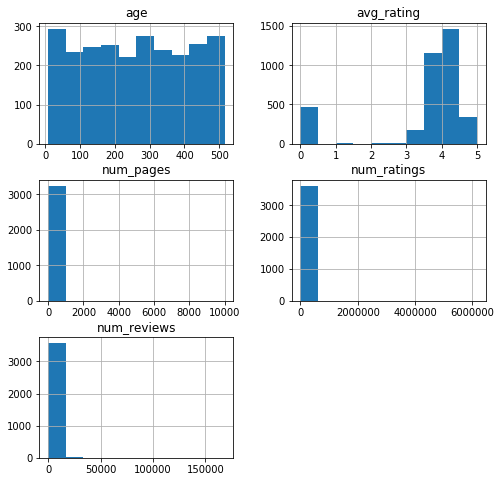

In [178]:
mask = df.dtypes == 'int64'
mask2 = df.dtypes == 'float64'

df.loc[:, mask | mask2].hist(figsize = (8, 8))

## Scatter plot: num_ratings vs age of book

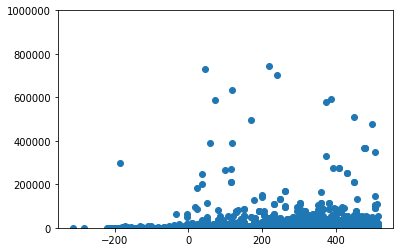

In [7]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], df['num_ratings'])
ax.set_ylim(0, 1000000)
plt.show()

## Scatter plot: num_reviews vs age of book

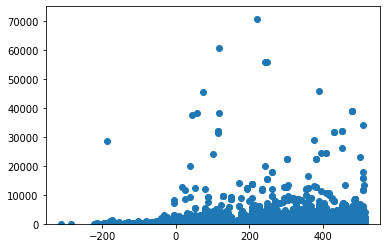

In [8]:
scatter = plt.figure()
ax = scatter.add_subplot(111)
ax.scatter(df['age'], df['num_reviews'])
ax.set_ylim(0, 75000)
plt.show()

There's one remarkable outlier which has > 6x as many ratings as the second highest rated book. This book is "The Hunger Games" by Suzanne Collins and is just a later edition of the 2008 best-seller. For full entry, see below.

Unfortunately, there doesn't appear to be an obvious correlation between the age of a book and its number of reviews or ratings.

In [9]:
print(df.loc[np.argmax(df['num_ratings'])][:])

url                      https://www.goodreads.com/book/show/49494289-t...
title                                                     The Hunger Games
author                                                     Suzanne Collins
num_ratings                                                        6154931
num_reviews                                                         168431
avg_rating                                                            4.33
num_pages                                                            387.0
language                                                           English
publish_date                                           2019-12-19 00:00:00
genres                   ['Teen', 'Young Adult', 'Fantasy', 'Dystopia',...
characters               ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...
series                                                 The Hunger Games #1
asin                                                            B002MQYOFW
rating_histogram         